#Homework #1 

##MAE 5093 - Numerical Engineering Analysis

###Submitted to: Dr. Omar San

###Author: Matt S Mitchell

####Problem 1
*Write a computer program for Lagrange interolation. Compare against Example 1.1 and discuss.*

#####The code for Lagrange inerpolation is shown below in the following cells.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
%matplotlib inline

In [2]:
def lagrange(xd, fd, x):
    f = 0.0
    for j in range(len(xd)):
        b = 1.0
        for i in range(len(xd)):
            if i != j:
                b = b * ((x - xd[i])/(xd[j] - xd[i]))
        f = f + fd[j] * b
    return f

In [3]:
def Runge(x):
    return (1 + 25 * x**2)**(-1)

In [4]:
xd = np.arange(-1.0, 1.2, 0.2)
yd = Runge(xd)

Here the Lagrange interpolation is validated against the Runge function for an x value of 0.7 and an f(x) value of -0.226 as indicated in the book.

In [5]:
print lagrange(xd, yd, 0.7)

-0.226196289063


##### a) Using the data of Example 1.1 find the interpolated value at x = 0.9.

The interpolated value for x = 0.9 is 1.578 as shown below.

In [6]:
print lagrange(xd, yd, 0.9)

1.57872099035


##### b) Use Runge’s function to generate a table of 21 equally spaced data points. Interpolate these data using a Lagrange polynomial of order 20. Plot this polynomial and comment on the comparison between your result and the plot of Example 1.1.

Below 21 equally spaced data points for the Runge function are shown. As expected the Lagrange polynomial predicts values near the center of the data, however, it oscillates towards the extents of the data.

In [7]:
xd1 = np.arange(-1.0,1.1,0.1)
yd1 = Runge(xd1)

x_poly = np.arange(-1.0,1.005, 0.005)
y_poly = lagrange(xd1, yd1, x_poly)

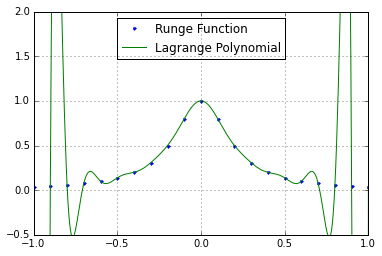

In [8]:
plt.plot(xd1, yd1, marker='.', linestyle = 'None', label="Runge Function")
plt.plot(x_poly, y_poly, label="Lagrange Polynomial")
plt.xlim([-1.0,1.0])
plt.ylim([-0.5, 2.0])
plt.legend(numpoints=1, loc='upper center')
plt.grid()
plt.show()

####Problem 2

#####Derive an expression for the derivative of a Lagrange polynomial of order n at a point x between the data points.

The Lagrange polynomial is expressed as follows:
$$P(x) = \sum_{j=0}^{n} y_j \prod_{i=0; j \neq i}^{n} \frac{x-x_i}{x_j-x_i}$$

To take the derivative of the funcion a small $n=2$ example was used.

$$P(x) = y_0 \left( \frac{x}{x_0-x_1} - \frac{x_1}{x_0-x_1} \right) \left( \frac{x}{x_0-x_2} - \frac{x_2}{x_0-x_2} \right) $$
$$ + y_1 \left( \frac{x}{x_1-x_0} - \frac{x_0}{x_1-x_0} \right) \left( \frac{x}{x_1-x_2} - \frac{x_2}{x_1-x_2} \right) $$
$$ + y_2 \left( \frac{x}{x_2-x_0} - \frac{x_0}{x_2-x_0} \right) \left( \frac{x}{x_2-x_1} - \frac{x_1}{x_2-x_1} \right) $$

From there, after taking the derivative the pattern was observable.

$$P'(x) = \sum_{j=0}^{n} y_j \prod_{i=0; j \neq i}^{n} \frac{1}{x_j-x_i} $$

####Problem 7

The tuition for 12 units at St. Anford University has been increasing from
1998 to 2008 as shown in the table below:

| Year| Tuition per year ($) |
|-----------------------|------------------|
| 1998                  | 21,300          |
| 1999                  | 23,057          |
| 2000                  | 24,441          |
| 2001                  | 25,917          |
| 2002                  | 27,204          |
| 2003                  | 28,564          |
| 2004                  | 29,847          |
| 2005                  | 31,200          |
| 2006                  | 32,994          |
| 2007                  | 34,800          |
| 2008                  | 36,030          |

#####a) Plot the given data points and intuitively interpolate (draw) a smooth curve through them.

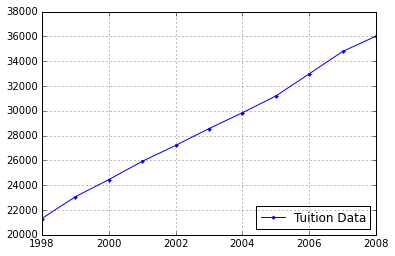

In [9]:
x_tuit = np.array(range(1998,2009))
y_tuit = np.array([21300, 23057, 24441, 25917, 27204, 28564, 29847, 31200, 32994, 34800, 36030])

plt.plot(x_tuit, y_tuit, marker='.', label="Tuition Data")
plt.legend(numpoints=1, loc='lower right')
plt.grid()
plt.show()

#####b) Interpolate the data with the Lagrange polynomial. Plot the polynomial and the data points. Use the polynomial to predict the tuition in 2010. This is an extrapolation problem; discuss the utility of Lagrange polynomials for extrapolation.

#####c) Repeat b) with a cubic spline interpolation and compare your results.

In [10]:
x_tuit_poly = np.arange(1998, 2010.05, 0.05)
y_tuit_poly = lagrange(x_tuit, y_tuit, x_tuit_poly)

f = PchipInterpolator(x_tuit, y_tuit, extrapolate=True)
y_tuit_spline = f(x_tuit_poly)

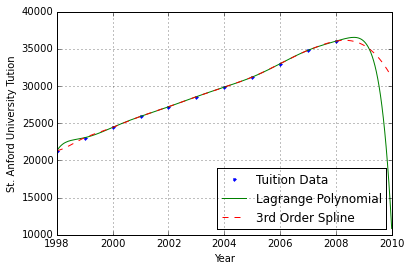

In [11]:
plt.plot(x_tuit, y_tuit, marker='.', label="Tuition Data", linestyle='none')
plt.plot(x_tuit_poly, y_tuit_poly, label="Lagrange Polynomial" )
plt.plot(x_tuit_poly, y_tuit_spline, label="3rd Order Spline", linestyle='--')
plt.legend(numpoints=1, loc='lower right')
plt.xlabel("Year")
plt.ylabel("St. Anford University Tution")
plt.grid()
plt.show()

b) ans: Using the Lagrange polynomial for extrapolation and data prediction beyond the data range is a bad idea. I wish tuition rates would drop, but sadly that is not the case. If we were to use the Lagrange polynomial for extrapolation, the tuition rate would be around $12,000.

c) ans: Cubic spline interpolation gave "better" results, however, the results are still not acceptable.

Note: I spent several hours replicating the spline code you provided, however, I was not sucessful at making it run. I ran into problems getting the ranges to replicate the same fortranic type behavior. With a little more time I am sure I could get it running. For this and the following problem I used the Scipy built-in spline interpolation features.

####Problem 8

The concentration of a certain toxin in a system of lakes downwind of an industrial area has been monitored very accurately at intervals from 1993 to 2007 as shown in the table below. It is believed that the concentration has varied smoothly between these data points.

| Year  | Toxin Concentration |
|-------|---------------------|
| 1993  | 12.0                |
| 1995  | 12.7                |
| 1997  | 13.0                |
| 1999  | 15.2                |
| 2001  | 18.2                |
| 2003  | 19.8                |
| 2005  | 24.1                |
| 2007  | 28.1                |

##### a) Interpolate the data with the Lagrange polynomial. Plot the polynomial and the data points. Use the polynomial to predict the condition of the lakes in 2009. Discuss this prediction.

##### b) Interpolation may also be used to fill “holes” in the data. Say the data from 1997 and 1999 disappeared. Predict these values using the Lagrange polynomialfitted through the other known data points.

##### c) Repeat (b) with a cubic spline interpolation. Compare and discuss your results.

In [12]:
x_lake = np.arange(1993,2009,2)
y_lake = np.array([12.0, 12.7, 13.0, 15.2, 18.2, 19.8, 24.1, 28.1])

x_lake_poly = np.arange(1993, 2009.05, 0.05)
y_lake_poly = lagrange(x_lake, y_lake, x_lake_poly)

f = PchipInterpolator(x_lake, y_lake, extrapolate=True)
y_lake_spline = f(x_lake_poly)

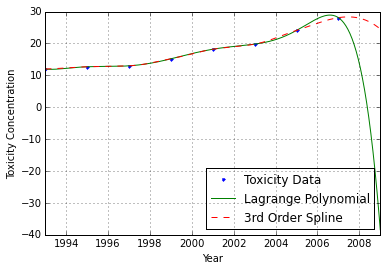

In [13]:
plt.plot(x_lake, y_lake, marker='.', label="Toxicity Data", linestyle='none')
plt.plot(x_lake_poly, y_lake_poly, label="Lagrange Polynomial" )
plt.plot(x_lake_poly, y_lake_spline, label="3rd Order Spline", linestyle='--')
plt.legend(numpoints=1, loc='lower right')
plt.xlabel("Year")
plt.ylabel("Toxicity Concentration")
plt.xlim([1993, 2009])
plt.grid()
plt.show()

In [14]:
x_lake_appended = np.array([1993, 1995, 2001, 2003, 2005, 2007])
y_lake_appended = np.array([12.0, 12.7, 18.2, 19.8, 24.1, 28.1])

x_lake_poly = np.arange(1993, 2009.05, 0.05)
y_lake_poly = lagrange(x_lake_appended, y_lake_appended, x_lake_poly)

f = PchipInterpolator(x_lake_appended, y_lake_appended, extrapolate=True)
y_lake_spline = f(x_lake_poly)

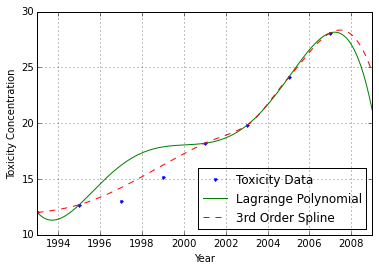

In [15]:
plt.plot(x_lake, y_lake, marker='.', label="Toxicity Data", linestyle='none')
plt.plot(x_lake_poly, y_lake_poly, label="Lagrange Polynomial" )
plt.plot(x_lake_poly, y_lake_spline, label="3rd Order Spline", linestyle='--')
plt.legend(numpoints=1, loc='lower right')
plt.xlabel("Year")
plt.ylabel("Toxicity Concentration")
plt.xlim([1993, 2009])
plt.grid()
plt.show()

a) ans: As with the previous example using the Lagrange polynomial for extrapolating data is not possible. The data trends up, while the Lagrange polynomial drops off sharply.

b) ans: Using the Lagrange polynomial to fill data, at least in this instance, does not appear to be sucessful. Using the polynomial would estimate toxicity levels well above the measure data.

c) ans: Using the spline in this instance appears to predict the data better than the Lagrange polynomial. 

##### Appendix: Spline code-not quite working

In [16]:
def spline(xd, fd, x):
    # Initialize
    nd = len(xd)
    g = np.zeros(nd)
    a = np.zeros(nd)
    b = np.zeros(nd)
    c = np.zeros(nd)
    r = np.zeros(nd)
    z = np.zeros(nd)
    
    for i in range(1, nd-1, 1):
        a[i] = (xd[i]-xd[i-1])/6.0
        b[i] = (xd[i+1]-xd[i-1])/3.0
        c[i] = (xd[i+1]-xd[i])/6.0
        r[i] = (fd[i+1]-fd[i])/(xd[i+1]-xd[i]) - (fd[i]-fd[i-1])/(xd[i]-xd[i-1])

    r[1] = r[1] - a[1]*g[0]
    r[nd-1] = r[nd-1] - c[nd-1]*g[nd]
    
    # Call Thomas algorithm
    z = tdma(a, b, c, r, 1, nd-1)
    
    # second derivatives
    for i in range1(1, nd-1, 1):
        g[i] = z[i]
        
    # construct the cubic spline polynomials inside the domain    
    for i in range1(0,nd-1, 1):
        if (x >= xd[i]) and x <= xd[i+1]:
            d = xd[i+1]-xd[i]
            
            f = g[i]/6.0*(((xd[i+1]-x)**3)/d - d*(xd[i+1]-x)) 
            + g[i+1]/6.0*(((x-xd[i])**3)/d - d*(x-xd[i])) 
            + fd[i]*(xd[i+1]-x)/d + fd[i+1]*(x-xd[i])/d
            
    
    # outside the domain
    if x <= xd[0]:
        i = 0
        
        d = xd[i+1]-xd[i]
        
        f = g[i]/6.0*(((xd[i+1]-x)**3)/d - d*(xd[i+1]-x)) 
        + g[i+1]/6.0*(((x-xd[i])**3)/d - d*(x-xd[i])) 
        + fd[i]*(xd[i+1]-x)/d + fd[i+1]*(x-xd[i])/d
    
    elif x >= xd[nd]:
        i = nd-1
        
        d = xd[i+1] - xd[i]
        
        f = g[i]/6.0*(((xd[i+1]-x)**3)/d - d*(xd[i+1]-x)) 
        + g[i+1]/6.0*(((x-xd[i])**3)/d - d*(x-xd[i])) 
        + fd[i]*(xd[i+1]-x)/d + fd[i+1]*(x-xd[i])/d

In [17]:
def tdma(a, b, c, r, s, e):
    # Tridagonal matrix algorithm (TDMA)
    # Thomas Algorithm
    # a: lower diagonal
    # b: main diagonal
    # c: upper diagonal
    # r: souce vector
    # x: solution vector
    #    for indicies s(start) to e(end)
    #    i: s,s+1,s+2,...,i,...,e
    #
    # Note: a(s) and c(e) are dummy coefficients, not used.
    
    # forward elmination phase
    for i in range1(s+1, e, 1):
        b[i] = b[i] - a[i]/b[i-1]*c[i-1]
        r[i] = r[i] - a[i]/b[i-1]*r[i-1]
    # backward elmination phase
    x[e] = r[e]/b[e]
    for i in range1(e-1,s,-1):
        x[i] = (r[i] - c[i] * x[i+1])/b[i]
        
    return x

In [18]:
range1 = lambda start, end, interval: range(start, end+1, interval)